<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Борис! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Исследование интернет-магазине «Стримчик»

 В ходе работы над данным проектом нам будет нужно выявить определяющие успешность игры закономерности. 
 Для этого во-первых, нужно будет обработать пропуски и дубликаты, привести в порядок названия столбцов, преобразовать типы данных и посчитайте суммарные продажи во всех регионах. 
 
 Далее проведем исследовательский анализ данных, а потом составим польщовательский портрет в каждом регионе. 
 
 В конце концов зададим и проверим несколько гипотез и напишем выводы

## Знакомство с общей информацией

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkMagenta'>👉 Желательно подробнее давать описание проекта с указанием его названия, ключевых данных (например, возрастной рейтинг) и план исследования.</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##  Подготовка данных

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Просмотрел весь раздел, но не нашел проверки явных дубликатов. Если мы это сделали, но потом код удалили, то это не совсем правильно, пусть все знают, что мы тщательно анализируем данные.</font><br>
<font color='Red'>🛠 Так же не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять лучше по имени, платформе и году релиза одновременно.</font>

### Приведение названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Иногда пишут длинный словарь для замены колонок, как в проекте по музыке.</font>

In [5]:
data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Преобразование данных к нужному типу

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Вынужден прервать ревью, так как проект не имеет необходимого оформления. Проект должен иметь структру с разделами и подразделами исследования, с формулировкой промежуточной задачи, с комментариями, что мы делаем, что получили. Каждый раздел/подраздел должен начинаться с названия, отражающего его содержание, и решаемой задачи, заканчиваться промежуточным выводом. <br>Отдельные строки кода выполняющие необходимые преобразования должны находиться в отдельных исполняемых ячейках, комментарии и промежуточные выводы должны размещаться в отдельных ячейках 'markdown'. <br>Ячейку кода ниже надо разделить на общие операции с комментированием преобразований и выводом на экран результатов.<br>Необходимо пройти по шагам проекта и добавить необходимые элементы. Подробнее описано в "Полезных инструкциях для учёбы".</font>

In [6]:
print(data['year_of_release'].unique())
print(data['genre'].unique())
print(data['critic_score'].unique())
print(data['user_score'].unique())
print(data['rating'].unique())
print(data['platform'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'


Неявные дубликаты не наблюдаются

In [7]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Удаление дубликатов

In [8]:
data['name'].value_counts()

Need for Speed: Most Wanted                 12
Madden NFL 07                                9
Ratatouille                                  9
LEGO Marvel Super Heroes                     9
FIFA 14                                      9
                                            ..
Let's Pilates!                               1
Dissidia 012: Duodecim Final Fantasy         1
Virtual Chess 64                             1
El Tigre: The Adventures of Manny Rivera     1
Digimon World Championship                   1
Name: name, Length: 11559, dtype: int64

In [9]:
data[data['name']=='Need for Speed: Most Wanted']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Здесь из явных дубликатов можно отметить 1190 и 1591, по скольоку одна и та же игра на одну и ту же платформу, но отличаетя год, скорее всего это разные части игры, либо опечатка по году релиза

In [10]:
data[data['name']=='LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
730,LEGO Marvel Super Heroes,X360,2013.0,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
945,LEGO Marvel Super Heroes,PS3,2013.0,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1139,LEGO Marvel Super Heroes,PS4,2013.0,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1959,LEGO Marvel Super Heroes,XOne,2013.0,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+
2313,LEGO Marvel Super Heroes,3DS,2013.0,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+
2778,LEGO Marvel Super Heroes,WiiU,2013.0,Action,0.31,0.35,0.02,0.06,82.0,8,E10+
3876,LEGO Marvel Super Heroes,PSV,2013.0,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN
5054,LEGO Marvel Super Heroes,DS,2013.0,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
8369,LEGO Marvel Super Heroes,PC,2013.0,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+


здесь одинаковое название игры принадлежит разным платформам, данные в порядке

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Так неявные дубликаты не найти, я же писал, что надо искать одновременно по трем колонкам.</font>

In [11]:
# Комментарий ревьюера 2
temp = data.copy()
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Посмотрим пропуски 

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast='integer')
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float', errors ='coerce')
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float32
rating              object
dtype: object

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

Сперва мы обработали "tbd", по информациии, которую мне удлаось найти, это означает "to be determined", и указывается когда у проекта еще мало оценок -> отсюда следует, что мы можем приравнять эти значения к nan

### Обработка пропусков

In [13]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
data[data['genre'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
data[data['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [18]:
data[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, не правильное оформление проекта. Все строки предусматривающие вывод информации на экран, должны выводиться на экран. Это можно сделать или размещением каждой строки кода в отдельной ячейке кода, или с использованием функции `display()`.</font>
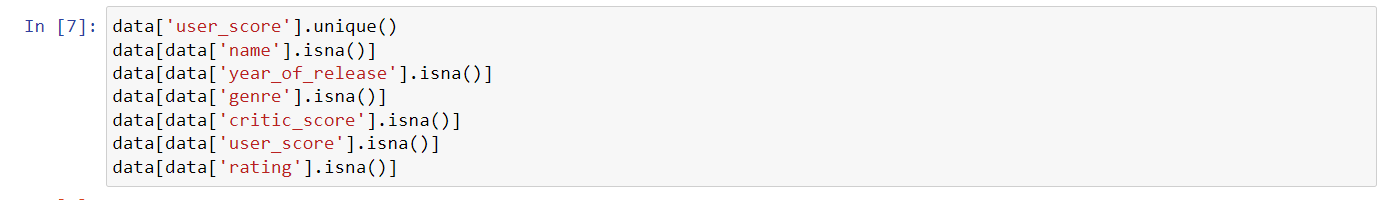

In [19]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['year_of_release'] = data['year_of_release'].round()
print(data['critic_score'].isnull().sum())
print(data['user_score'].isnull().sum())


0
0


In [20]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


In [21]:
data = data.dropna(subset = ['genre'])
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['year_of_release'])
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


заменили пропуски nan на -1, теперь пропусков нет

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, поставили заглушки на пропуски в отзывах, главное потом при анализе их отфильтровывать.</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

 ### Посчет суммарных продаж во всех регионах 

In [22]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


Добавили столбец с общими продажами по региону 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>
Опишите причины, которые могли привести к пропускам</b> <br>А это не сделано.</font><br>
<font color='Red'>🛠 Раздел предобработки данных должен заканчиваться выводами по проведенному анализу и обработке данных.</font>

In [24]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           9768 non-null   object 
 11  sales_total      16444 non-null  float64
dtypes: float32(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем понятное решение, всего два пропуска в колонках `name` и `genre`, да еще в этих строках пропуски по отзывам и рейтингу. Может проще удалить?</font><br>
<font color='DarkMagenta'>👉 Стоило ли оставлять пропуски года релиза? Если посмотреть на строчки с этими пропусками, то увидим, что там пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей. Пропусков около 1,6 %, можно было бы и удалить.</font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

Пропущенные значения полностью обработаны

Причиные которые могли привести к пропускам:
    
-некорректное заполнение данных
-отсутсвие информации в системе
-отсутствие определнного рейтинга или оценки

 Промежуточный вывод по пункту 2:
 
Выолнены все задаччи данного пункта, а именно:
Приведение назнивая столбцов к нижнему регисстру, Преобразование данных, обработка пропусков и дубликатов, Подсчет суммарных продаж.
 
Названия столбцов были написаны неправильным регистром, были явные дкбликаты, неправильные типы данных в нескольких столбцах и отсуствие некоторой информации, которкую не получится восполнить


<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Уже лучше. Умение формулировать выводы необходимый навык в нашей специальности.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Промежуточный вывод после каждого раздела в проекте помогает понять, какие результаты были получены на данном этапе работы и как они соотносятся с целями и задачами раздела. Он может служить отправной точкой для дальнейшего анализа и развития проекта.<br>
Кроме того, промежуточный вывод может помочь убедиться, что все необходимые задания были выполнены и результаты соответствуют целям проекта. Это может предотвратить ошибки и проблемы в дальнейшем процессе работы над проектом.<br>
В целом, написание промежуточного вывода после каждого раздела может быть полезным для понимания прогресса в проекте и обеспечения его качества.<br>
Промежуточный вывод должен содержать следующие основные моменты:<br>
- Краткое описание целей и задач раздела.<br>
- Основные результаты, полученные на данном этапе работы.<br>
- Анализ полученных результатов и их соответствие целям раздела.<br>
- Возможные проблемы и трудности, с которыми столкнулись при выполнении раздела.<br>
- Рекомендации по дальнейшим шагам и развитию проекта.<br>
Промежуточный вывод должен быть кратким и лаконичным, чтобы не перегружать заказчика лишней информацией.</font>

## Проведение исследовательского анализа данных

### выпуск игр в разные годы

Text(0, 0.5, 'количество релизов')

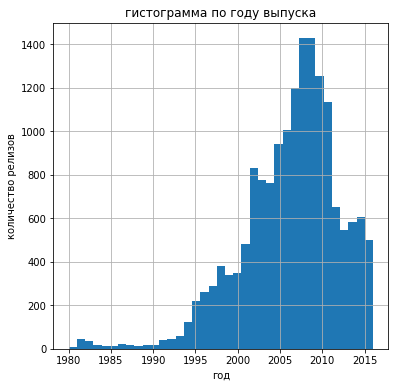

In [25]:
data['year_of_release'].hist(bins=37, figsize=(6,6))
plt.title('гистограмма по году выпуска')
plt.xlabel('год')
plt.ylabel('количество релизов')

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Теперь правильно. 👍</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, разве в 2016 году был пик продаж? НИже указано чему должен соответствовать параметр `bins`.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что оси подписаны и есть название графика.</font><br>
<font color='Red'>🛠 Для того, что бы гистограмма отражала выпуск игр по годам надо подобрать параметр `bins` равный количеству годов релиза в нашем датасете, только надо учитывать первый и последний года релиза в этом диапазоне. Тогда не будет не равномерных промежутков на графике. </font><br>
<font color='DarkMagenta'>👉 А можно, что бы не расчитывать `bins`, построить столбчатую диаграмму, она сама выведет необходимое количество годов релиза.</font>

 Данные до 1995 года можно не брапть в рассчет, так как в то время игр выпускалось крайне мало
 Потом они начали появляться. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого мы наблюдаем спад

### Изменение продаж по платформам

In [26]:
platform_sales_pivot_table = pd.pivot_table(data, index=['platform'], values='sales_total', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('sales_total',ascending=False)
platform_sales_pivot_table

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При анализе принято визуализировать результаты в виде графиков или диаграмм. Таблицы малоинформативны и не наглядны. Можно вот так:</font>
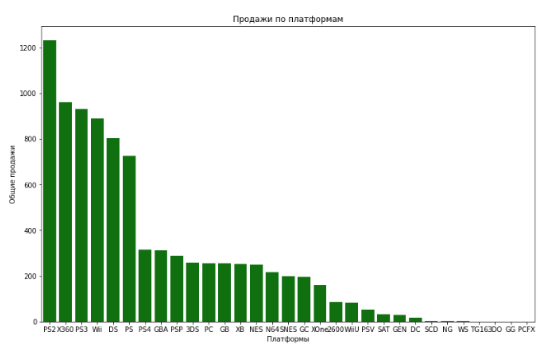

In [27]:
best_sales_platform = list(platform_sales_pivot_table.index[:8])
best_sales_platform 

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

Будем анализировать только топ-8, начиная с 7 места количество падает более чем в 2 раза, но PS4 придется добавить для исследования будущих прогнозов, можно было бы добавить XboxOne но по нему сильно меньше данных

In [28]:
for platform in best_sales_platform:
    platform_sales_pivot_table = pd.pivot_table(data.query('platform == @platform'), index=['platform','year_of_release'], values='sales_total', aggfunc='sum')
    print(platform_sales_pivot_table)
    print()

                          sales_total
platform year_of_release             
PS2      2000.0                 39.17
         2001.0                166.43
         2002.0                205.38
         2003.0                184.31
         2004.0                211.81
         2005.0                160.66
         2006.0                103.42
         2007.0                 75.99
         2008.0                 53.90
         2009.0                 26.40
         2010.0                  5.64
         2011.0                  0.45

                          sales_total
platform year_of_release             
X360     2005.0                  8.25
         2006.0                 51.62
         2007.0                 95.41
         2008.0                135.26
         2009.0                120.29
         2010.0                170.03
         2011.0                143.84
         2012.0                 99.74
         2013.0                 88.58
         2014.0                 34.74
         20

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким артефактом у платформы DS. Тогда бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
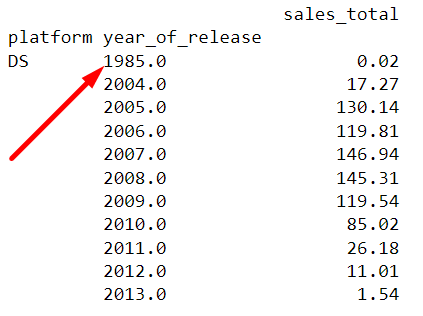

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Как-то не корректно определять срок жизни платформы "на глазок", его расчет из данных таблицы был бы более уместен, например, как показано ниже. Вопрос брать ли платформы всего датасета, или ограничивать периодом начала роста продаж, остается открытым, но можно поэкспериментировать.</font>

In [29]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Судя по полученным данным эпоха каждоый платформы длится примерно 7 лет
самой перспективной и самой успешной платформой точно станет PS4, а также Xbox One, по остальным платформам продажи падают, так как потерялась их актуальность, либо на смену пришло новое поколение платформы

Учту данный комментарий в дальнейшем, благодарю за помощь с кодом

### Актуализация периода

In [30]:
actual_data = data.query('year_of_release > 2012')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

Возьмем только актуальные данные для построения прогноза на 2017 год, а также для ящика с усами
благодаря этим данынм можно сказать следующее

### Анализ платформ по продажам

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Визуализация данных графиками и диаграммами подразумевает подписи всех осей и название графика  на русском языке, при необходимости наличие меток. Это относится ко всем графикам/диаграммам проекта и является критической ошибкой.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Диаграмма не оформлена необходимым образом. Здесь и далее в проекте.<br>Если есть с этим трудности, то следует обратиться за помощью к преподавателю.</font>

Text(0.5, 0, 'Название tплатформы')

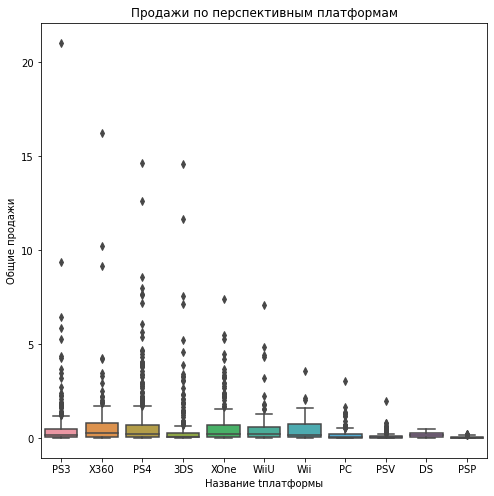

In [31]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='platform', y='sales_total', data=actual_data)
plt.title('Продажи по перспективным платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Название tплатформы')

(0.0, 2.0)

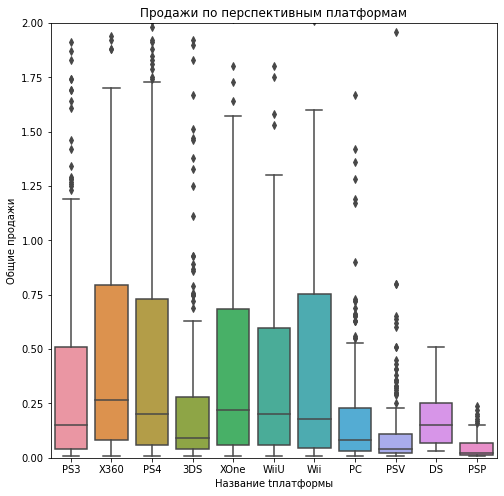

In [32]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='platform', y='sales_total', data=actual_data)
plt.title('Продажи по перспективным платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Название tплатформы')
plt.ylim([0,2])

Комментарий учтен, боксплоты вывдены по всем актуальным платформам на одной оси, один вывод с использованием  ylim

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Почему строим диаграммы размаха не по всем платформам? В задании топ-платформы не требуются, предполагаются все за актуальный период. Таким образом можно потерять значимую информацию. <br>Видимо, ввело в заблуждение предыдущее задание, где надо было определить лидеров. Но в заданиях на проект отдельно указывается, где необходимо анализировать топ.<br> Всегда при анализе следует использовать все данные, а потом можно их фильтровать от лишней информации.<br>А диаграммы размаха надо строить на одной координатной сетке в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами, должны быть не видны медиана и 75% квантиль. Для вывода только нижней части boxplot-ов необходимо использовать параметр ylim(). Пример ниже: </font>
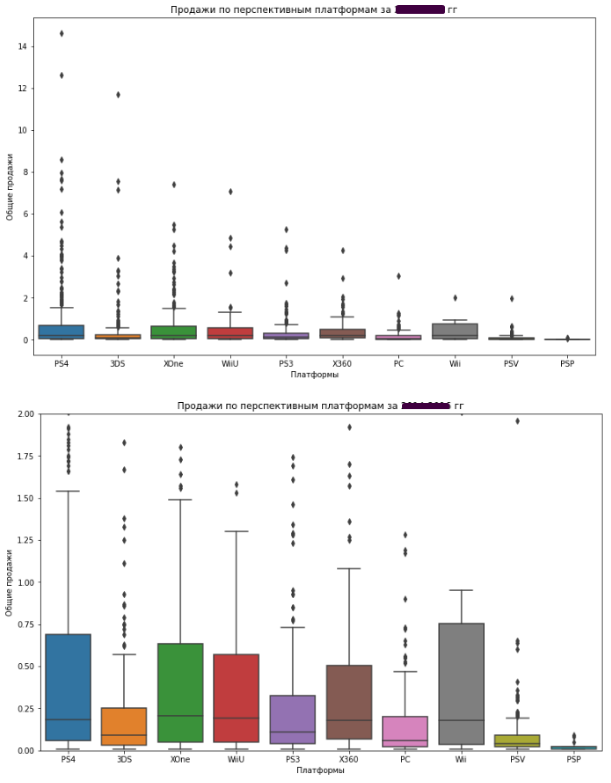

Разница в продажах отличается. Есть очень популярные игры, которые долго продаются и приносят компании много прибыли,  но таковых очень мало

По платформам - картина следующая, топ-5:

1)X360

2)Wii

3)PS4

4)Xone

5)Wiiu


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
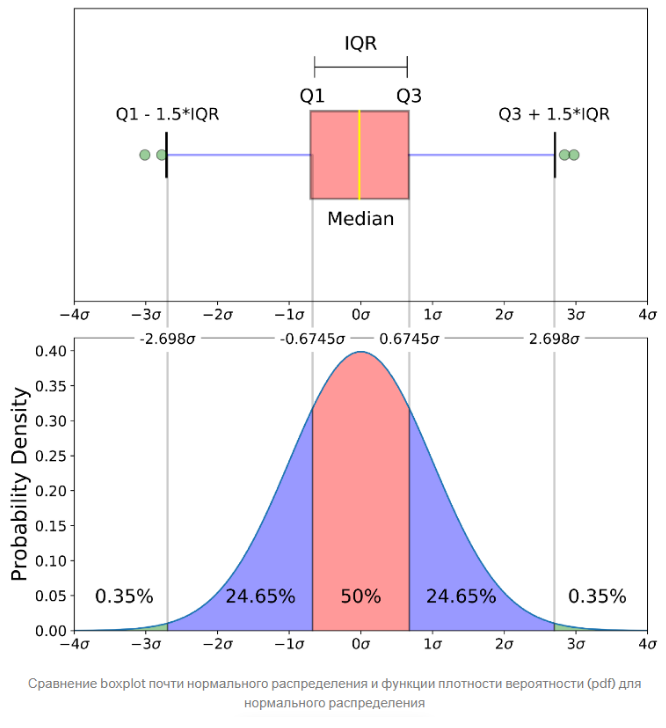

### влияние отзывовов пользователей и критиков на продажи

Text(0.5, 0, 'Общие продажи')

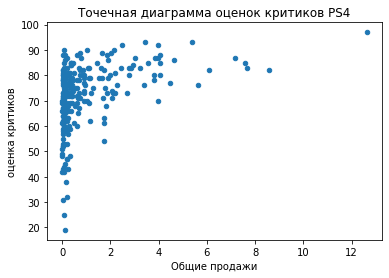

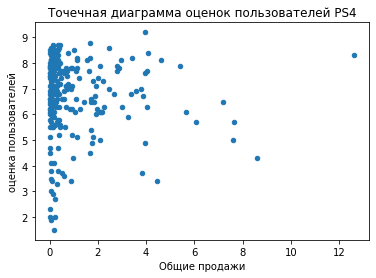

In [33]:
PS4_actual_data = actual_data[actual_data['platform']=='PS4']
PS4_sales_ratings = PS4_actual_data.loc[:,['sales_total', 'critic_score', 'user_score']]
PS4_sales_ratings.query('critic_score != -1').plot(x='sales_total',y='critic_score',kind='scatter')
plt.title('Точечная диаграмма оценок критиков PS4')
plt.ylabel('оценка критиков')
plt.xlabel('Общие продажи')


PS4_sales_ratings.query('user_score != -1').plot(x='sales_total',y='user_score',kind='scatter')
plt.title('Точечная диаграмма оценок пользователей PS4')
plt.ylabel('оценка пользователей')
plt.xlabel('Общие продажи')

In [34]:
PS4_sales_ratings.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.226526,0.115961
critic_score,0.226526,1.000000,0.907449
user_score,0.115961,0.907449,1.000000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Конечно, диаграмма попарных отношений очень удобна, но в данном случае она не информативна, так как из-за малого масштаба данных отзывы просто сливаются. Следует использовать точечные диаграммы: `.plot(kind='scatter',......)`.</font><br>
<font color='Red'>🛠  И забыли отфильтровать заглушки в оценках критиков и пользователей.  И корреляцию считаем с заглушками. Только одновременно отфильтровывать их не надо. Если анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных.</font>
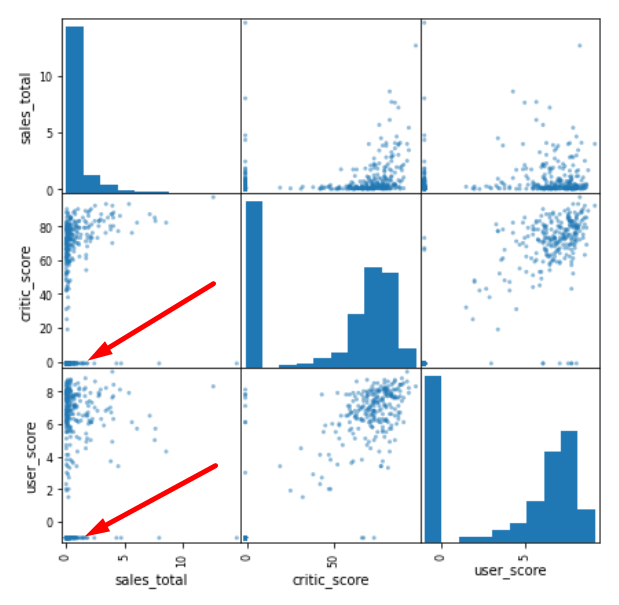

Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков



Посмотрим как дела у прямого конкурента

Text(0.5, 0, 'Общие продажи')

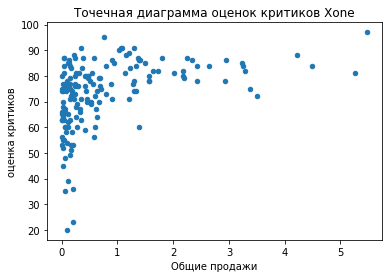

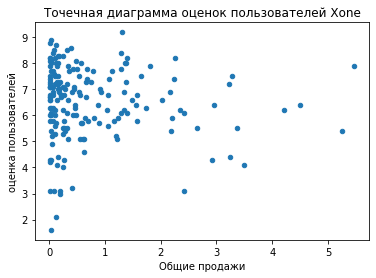

In [35]:
Xone_actual_data = actual_data[actual_data['platform']=='XOne']
Xone_sales_ratings = Xone_actual_data.loc[:,['sales_total', 'critic_score', 'user_score']]
Xone_sales_ratings.query('critic_score != -1').plot(x='sales_total',y='critic_score',kind='scatter')
plt.title('Точечная диаграмма оценок критиков Xone')
plt.ylabel('оценка критиков')
plt.xlabel('Общие продажи')

Xone_sales_ratings.query('user_score != -1').plot(x='sales_total',y='user_score',kind='scatter')
plt.title('Точечная диаграмма оценок пользователей Xone')
plt.ylabel('оценка пользователей')
plt.xlabel('Общие продажи')



In [36]:
Xone_sales_ratings.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.273782,0.121712
critic_score,0.273782,1.000000,0.781040
user_score,0.121712,0.781040,1.000000


Text(0.5, 0, 'Общие продажи')

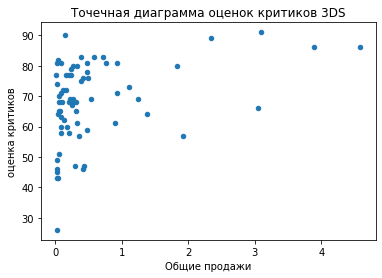

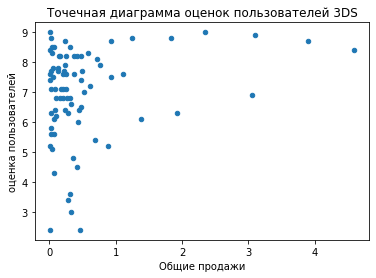

In [37]:
DS_actual_data = actual_data[actual_data['platform']=='3DS']
DS_sales_ratings = DS_actual_data.loc[:,['sales_total', 'critic_score', 'user_score']]
DS_sales_ratings.query('critic_score != -1').plot(x='sales_total',y='critic_score',kind='scatter')
plt.title('Точечная диаграмма оценок критиков 3DS')
plt.ylabel('оценка критиков')
plt.xlabel('Общие продажи')


DS_sales_ratings.query('user_score != -1').plot(x='sales_total',y='user_score',kind='scatter')
plt.title('Точечная диаграмма оценок пользователей 3DS')
plt.ylabel('оценка пользователей')
plt.xlabel('Общие продажи')


In [38]:
DS_sales_ratings.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.060809,0.045450
critic_score,0.060809,1.000000,0.885053
user_score,0.045450,0.885053,1.000000


Text(0.5, 0, 'Общие продажи')

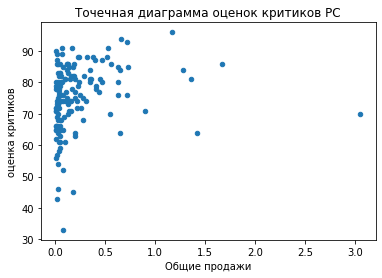

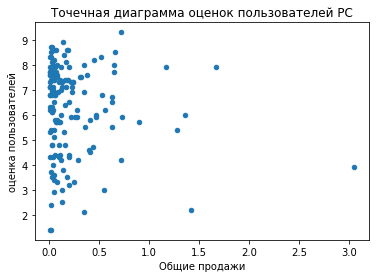

In [39]:
PC_actual_data = actual_data[actual_data['platform']=='PC']
PC_sales_ratings = PC_actual_data.loc[:,['sales_total', 'critic_score', 'user_score']]
PC_sales_ratings.query('critic_score != -1').plot(x='sales_total',y='critic_score',kind='scatter')
plt.title('Точечная диаграмма оценок критиков PC')
plt.ylabel('оценка критиков')
plt.xlabel('Общие продажи')


PC_sales_ratings.query('user_score != -1').plot(x='sales_total',y='user_score',kind='scatter')
plt.title('Точечная диаграмма оценок пользователей PC')
plt.ylabel('оценка пользователей')
plt.xlabel('Общие продажи')

In [40]:
PC_sales_ratings.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.185205,0.049492
critic_score,0.185205,1.000000,0.805689
user_score,0.049492,0.805689,1.000000


<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Можно весь анализ сделать в одном цикле, примерно вот так:</font>

Расчет по Платформе 3DS


user_score     0.241504
sales_total    1.000000
Name: sales_total, dtype: float64

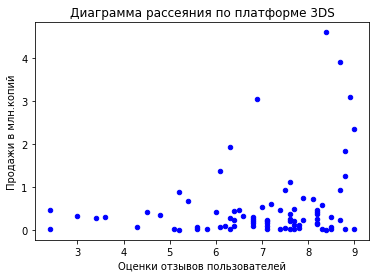

critic_score    0.357057
sales_total     1.000000
Name: sales_total, dtype: float64

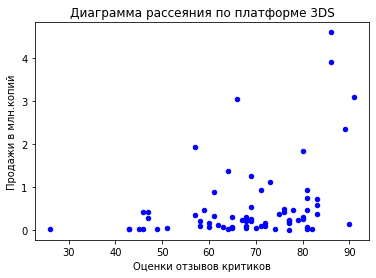

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.093842
sales_total    1.000000
Name: sales_total, dtype: float64

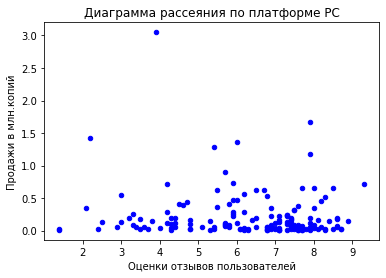

critic_score    0.19603
sales_total     1.00000
Name: sales_total, dtype: float64

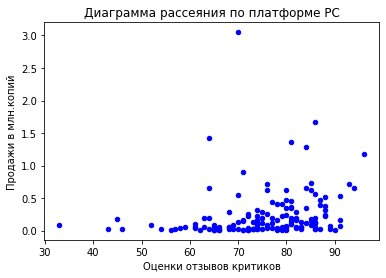

Расчет по Платформе PS3


user_score     0.002394
sales_total    1.000000
Name: sales_total, dtype: float64

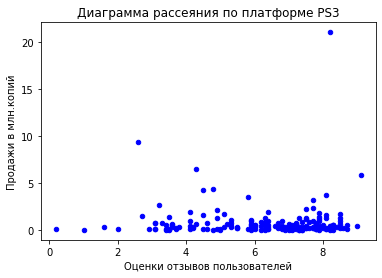

critic_score    0.334285
sales_total     1.000000
Name: sales_total, dtype: float64

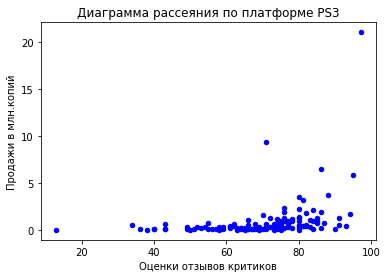

Расчет по Платформе PS4


user_score    -0.031957
sales_total    1.000000
Name: sales_total, dtype: float64

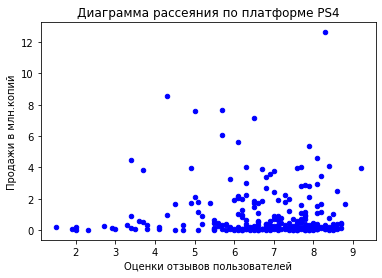

critic_score    0.406568
sales_total     1.000000
Name: sales_total, dtype: float64

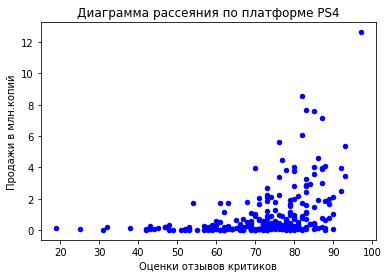

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score     0.000942
sales_total    1.000000
Name: sales_total, dtype: float64

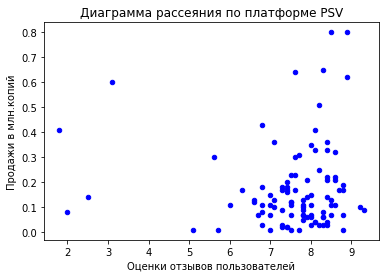

critic_score    0.254742
sales_total     1.000000
Name: sales_total, dtype: float64

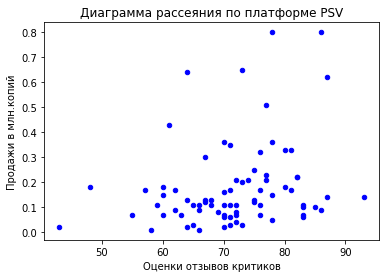

Расчет по Платформе Wii


user_score     0.682942
sales_total    1.000000
Name: sales_total, dtype: float64

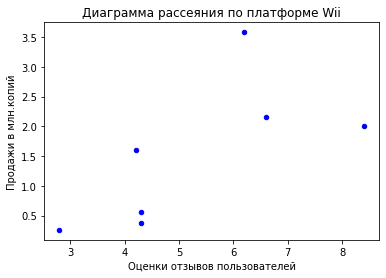

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.41933
sales_total    1.00000
Name: sales_total, dtype: float64

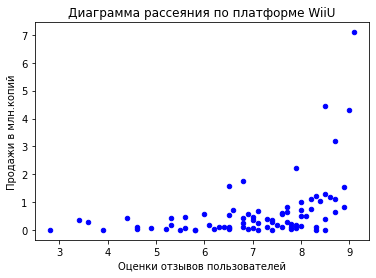

critic_score    0.376415
sales_total     1.000000
Name: sales_total, dtype: float64

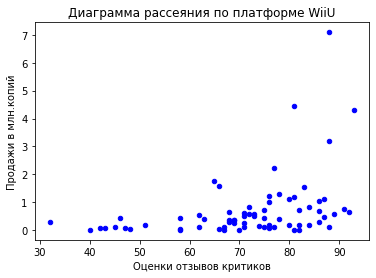

Расчет по Платформе X360


user_score    -0.011742
sales_total    1.000000
Name: sales_total, dtype: float64

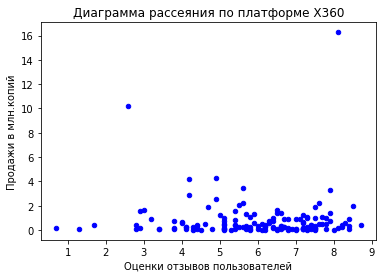

critic_score    0.350345
sales_total     1.000000
Name: sales_total, dtype: float64

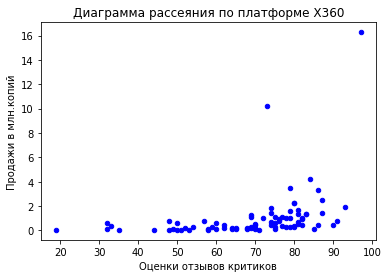

Расчет по Платформе XOne


user_score    -0.068925
sales_total    1.000000
Name: sales_total, dtype: float64

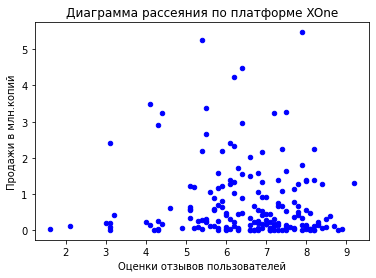

critic_score    0.416998
sales_total     1.000000
Name: sales_total, dtype: float64

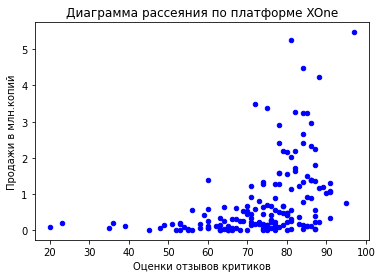

In [64]:
# Комментарий ревьюера 3
import matplotlib.pyplot as plt
df_sc, y = actual_data.copy(), 'sales_total'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

 Почти нигде нет рейтинга критиков ниже 40. Оценка польозователей на 3DS в среднем выше чем на других платформах, самая лучашя картина на PS4, там больше всего усешнных проектов на основании оценок и продаж
 На втором месте идет Xbox One. Также четко вдино что критики больше любят игровые консоли
 

Самая большая кореллция между Оценкой критика и общими продажами у Xbox One, немногим ниже у PS4, самая маленькая у 3DS. 

Самая большая корелляция между оценкой пользователя и общими продажами также у Xbox One, меньше всего у 3DS

Можно сделать вывод, что пользователи Xone большще всего зависят от общственного мнения

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
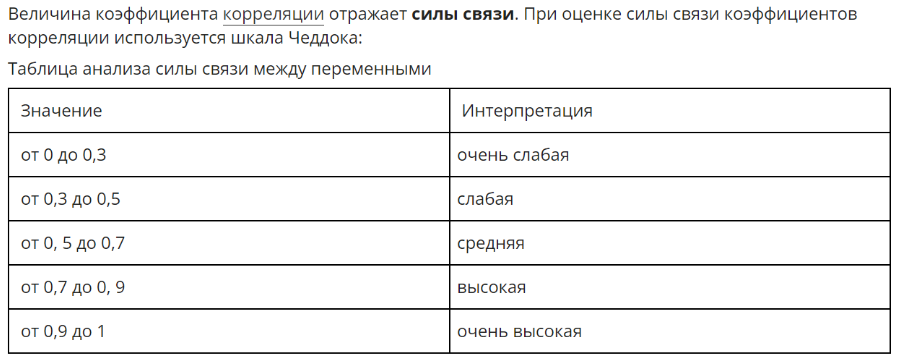

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Забыли сделать расчет корреляции между видами отзывов и продажами по нескольким платформам.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А сделанно только две. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом по каждой платформе и по каждому виду отзывов.</font>

### общее распределение игр по жанрам

In [41]:
genre_pivot_table = pd.pivot_table(actual_data, index='genre', values='sales_total', aggfunc='median')
genre_pivot_table.sort_values('sales_total', ascending=False)

,sales_total
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


(0.0, 2.0)

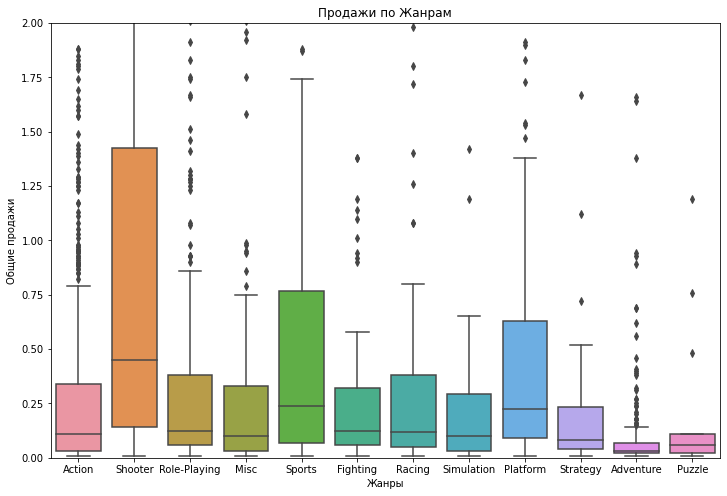

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='sales_total', data=actual_data)
plt.title('Продажи по Жанрам')
plt.ylabel('Общие продажи')
plt.xlabel('Жанры')
plt.ylim([0,2])

Самые продаваемые жанры - Экшн, платформ и спорт.

популярность первых обусловлена динамичностью событий, и спроса на рынке геймеров, также в шутеры обычно играют командами онлайн. Спортивные игры позволяют людям окунуться в мир спорта через игру, и сыграть за кумиров

самые не интересные жанры - Симуляторы, приключения, стратегии и паззлы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

Исправлено, сравниванием медианные продажи

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br><font color='Red'>🛠 Не откорректирован вывод анализа.</font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

ОБЩИЙ вывод по 3 пункут:
Были даны ответы на все поставленые вопросы и рассуждения подкреплены обоснованиями.

На 2017 год планируется увеичение рынка и спроса на PS4 и Xbox One. 
Также я предполагаю, что будет больше новых игр и больше продаж, так как люди продолжат обновлять поколение своих приставок
Также стоит взять во внимание самые успешные жанры игры: 

Shooter, Sposts, Platform

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь корректный вывод.</font>

## Составление портрета пользователя каждого региона

### Самые популярные платформы 

In [43]:
na_pivot_table = pd.pivot_table(actual_data, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_pivot_table.head()


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [44]:
eu_pivot_table = pd.pivot_table(actual_data, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_pivot_table.head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [45]:
jp_pivot_table = pd.pivot_table(actual_data, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_pivot_table.head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Text(0.5, 1.0, 'Доля платформ в Японии')

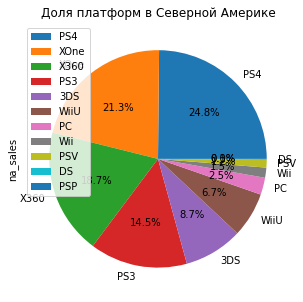

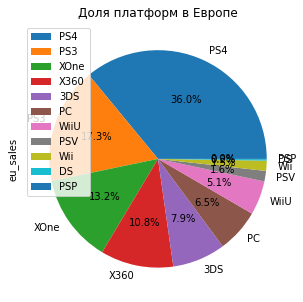

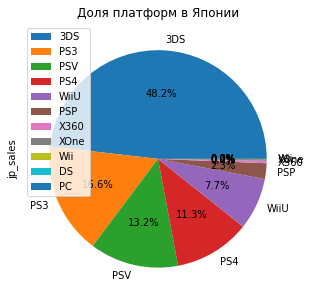

In [46]:

na_pivot_table.plot(y = 'na_sales',kind = 'pie',figsize = (5,5),autopct='%1.1f%%')
plt.title('Доля платформ в Северной Америке')
eu_pivot_table.plot(y = 'eu_sales',kind = 'pie',figsize = (5,5),autopct='%1.1f%%')
plt.title('Доля платформ в Европе')
jp_pivot_table.plot(y = 'jp_sales',kind = 'pie',figsize = (5,5),autopct='%1.1f%%')
plt.title('Доля платформ в Японии')

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошее решение.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом. Нет названия диаграмм.</font>
<br>
<font color='DarkMagenta'>👉 Лучше на диаграмме указывать проценты, параметром `autopct='%1.1f%%'`. </font><br>
<font color='DarkGreen'>👌 Если бы использовали `plt.subplots()`, то можно было разместить круговые диаграммы в один ряд. Тогда была более наглядная разница между регионами.</font>

На популярность платформы в регионе сильно влияет присутствие в ней производителя, например, в Японии популярно 3DS и PS, так как компании-производителии родом из Японии, только засчет рынка северной америки Xbox более менее существует, а в Европе просто придерживаются большинства.

### Самые популярные жанры 

In [47]:
na_genre_pivot_table = pd.pivot_table(actual_data, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_pivot_table


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [48]:
eu_genre_pivot_table = pd.pivot_table(actual_data, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_pivot_table

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [49]:
jp_genre_pivot_table = pd.pivot_table(actual_data, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_pivot_table



,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


/tmp/ipykernel_511/437508173.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:title={'center':'Доля по жанрам в Японии'}, ylabel='jp_sales'>

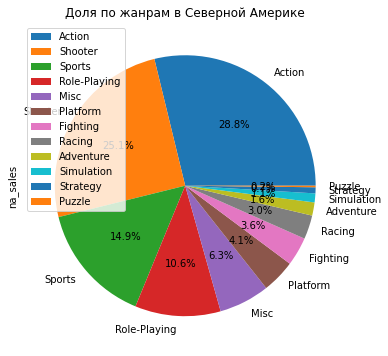

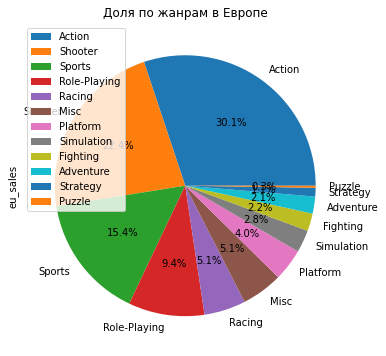

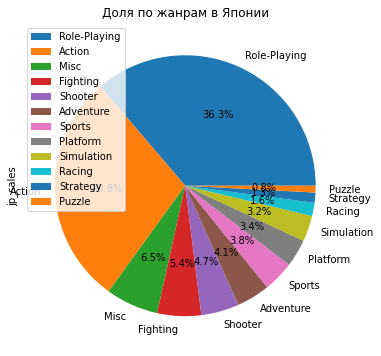

In [50]:
na_genre_pivot_table.plot(y = 'na_sales',kind = 'pie',figsize = (6,6), autopct='%1.1f%%')
plt.title('Доля по жанрам в Северной Америке')
eu_genre_pivot_table.plot(y = 'eu_sales',kind = 'pie',figsize = (6,6), autopct='%1.1f%%')
plt.title('Доля по жанрам в Европе')
jp_genre_pivot_table.plot(y = 'jp_sales',kind = 'pie',figsize = (6,6), autopct='%1.1f%%')
plt.title('Доля по жанрам в Японии')
plt.subplot()


<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Когда выскакивают предупреждения, это означает, что в будущей новой версии библиотеки применяемый метод обработки будет не применим. Если мы планируем данный код использовать в будущем, то надо разобраться и изменить код. Если нам он в будущем не понадобится, то можно принудительно запретить вывод предупреждений вставив в ячейку с библиотеками вот такой код: <br>`pd.set_option('chained_assignment', None)` или такой: <br></font>
`import warnings`<br>
`warnings.filterwarnings("ignore")`

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом. Нет названия диаграмм.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. Здесь этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
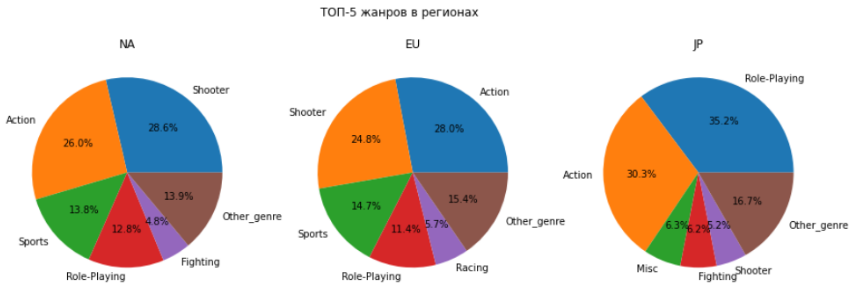

Комментарий учтен

Топ 5 жанров по странам:
Северная Америка: Action, Shooter, Sports, Role-Playing и Misc 

Европа: Action, Shooter, Sports, Role-Playing и Racing

Япония: Role-Playing, Action, Misc, Fighting и Shooter


### Влияение рейтинга ESRB на продажи в отдельном регионе

In [51]:
rating_na = pd.pivot_table(actual_data, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
rating_na

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [52]:
rating_eu = pd.pivot_table(actual_data, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
rating_eu

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [53]:
rating_jp = pd.pivot_table(actual_data, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
rating_jp

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


в Америке и Европы популярнее игры "М" - это для игроков старше 17 лет

В Японии "T" - для игроков старше 13 лет

Text(0.5, 1.0, 'Япония')

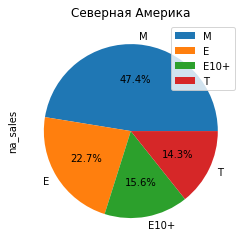

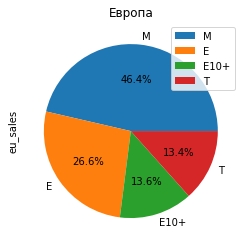

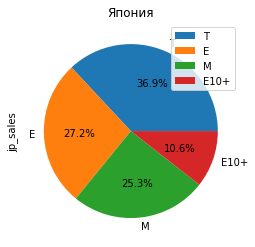

In [54]:

rating_na.plot(y = 'na_sales',kind = 'pie',figsize = (4,4), autopct='%1.1f%%')
plt.title('Северная Америка')
rating_eu.plot(y = 'eu_sales',kind = 'pie',figsize = (4,4), autopct='%1.1f%%')
plt.title('Европа')
rating_jp.plot(y = 'jp_sales',kind = 'pie',figsize = (4,4), autopct='%1.1f%%')
plt.title('Япония')


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При предобработке данных не была поставлена заглушка на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И это необходимо учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

Учту в будущем 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Если бы вывели на диаграммы заглушку, получили бы важный результат о предпочтениях пользователей Японии играм без Северо-Американского возрастного рейтинга. Пример для актуального периода 2014-2016 года.</font>
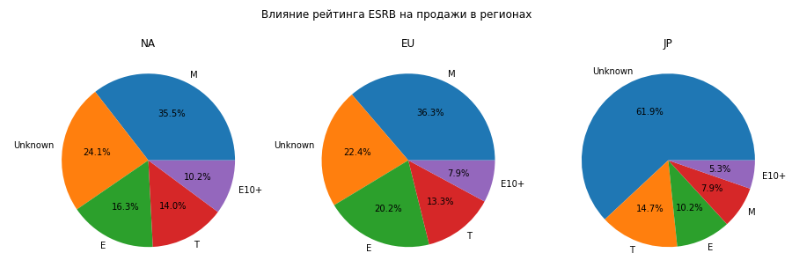

In [55]:
# Комментарий ревьюера
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

977 0.43752798925212716


M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

исходя из выполнения пункта 4 можно составить портреты игроков для каждого региона:

Америка - старше 17 лет, популярность PS4 и Xone почти равна, любит играть в шутеры и экшн
Европа - старше 17 лет, PS4 лидирует с большим отрывом, вкусовые предпочтения: шутеры и экшн, в отличие от америки еще и гонки
Япония - старше 13 лет, портативные прситавки 3DS + PSV, а также PS3

## Проверка гипотез

### Первая гипотеза

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза -  Рейтинги PC и Xbox One не равны

In [56]:
rating_XOne = actual_data.query('platform == "XOne" and user_score != -1')['user_score']
rating_PC = actual_data.query('platform == "PC" and user_score != -1')['user_score']


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не отфильтрованы заглушки.</font>

Исправлено

In [57]:
# Комментарий ревьюера
rating_XOne.min(),rating_PC.min()

(1.6, 1.4)

In [58]:
alpha = 0.05

results = st.ttest_ind(rating_PC, rating_XOne, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Подтверждаем нулевую гипотезу') 

p-value: 0.14012765210016784
Подтверждаем нулевую гипотезу


In [59]:
rating_XOne.mean(),rating_PC.mean()

(6.521428, 6.2696776)

Нулевая гипотеза подтвердилась, p-value больше чем  уровень стат значимости, хотя средние значения немного отличаются

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И какой вывод результата тестирования?</font>

### Вторая гипотеза


Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются



<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [60]:
user_rating_Action = actual_data.query('genre == "Action" and user_score != -1')['user_score']
user_rating_Sports = actual_data.query('genre == "Sports" and user_score != -1')['user_score']




In [61]:
# Комментарий ревьюера
user_rating_Action.min(), user_rating_Sports.min()

(2.0, 0.2)

In [62]:
alpha = 0.05

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.0517772011408453e-27
Отвергаем нулевую гипотезу


In [63]:
print(user_rating_Sports.mean())
print(user_rating_Action.mean())

5.238125
6.837532


На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Следовало написать, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не сформулирован вывод тестирования гипотез. <br>Рекомендую прочитать статью: https://allatambov.github.io/psms/pdf/hypo-test.pdf</font>

ВЫВОД:

обе гипотезы были двусторонними и сформулированы на основании равенства средних значений, 
уровень статисчтисекой значимости прмиеняли 0.05
Мы применили t-критерий, потому что он работает с выборками любого размера

В пункте 5 мы проверили 2 гипотезы, одна подтвердилась, а вторая нет

## Общий вывод

ОБЩИЙ ВЫВОД:

В ходе выполнения данного проекта было сделано несколько шагов:
Шаг 1. 

Импорт библиотек, знакомство с данными, вывод данных, просмотр информации о данных 

Шаг 2.

Проведена предобработка таблицы:
Оработка аномалий,
замена Названий столбцов,
заполнение пропусков,
удаление дубликатов
Добавлен новый столбец

Вывод по 2 Шагу: данные имели пропуски - к этому могло привести незаполнение данных до конца, или же отсутствие данных в других столбцах. Всего 12 основных жанров игр, временной промежуток исследования 1983 - 2015, 32 вида консолей

Шаг 3.

Проведен анализ даннных

Данные до 1995 года можно не брапть в рассчет, так как в то время игр выпускалось крайне мало Потом они начали появляться. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого мы наблюдаем спад

Анализировались только топ-8 платформ, начиная с 7 места количество падает более чем в 2 раза, но PS4 придется добавить для исследования будущих прогнозов, можно было бы добавить XboxOne но по нему сильно меньше данных

Актуализирован период для построения прогноза на 2017 год

Почти нигде нет рейтинга критиков ниже 40. Оценка польозователей на 3DS в среднем выше чем на других платформах, самая лучашя картина на PS4, там больше всего усешнных проектов на основании оценок и продаж На втором месте идет Xbox One. Также четко вдино что критики больше любят игровые консоли

Самые продаваемые жанры - Экшн, платформ и спорт

самые не интересные жанры - Симуляторы, приключения, стратегии и паззлы

Шаг 4.

На популярность платформы в регионе сильно влияет присутствие в ней производителя, например, в Японии популярно 3DS и PS, так как компании-производителии родом из Японии, только засчет рынка северной америки Xbox более менее существует, а в Европе просто придерживаются большинства.

Топ 5 жанров по странам: Северная Америка: Action, Shooter, Sports, Role-Playing и Misc
Европа: Action, Shooter, Sports, Role-Playing и Racing
Япония: Role-Playing, Action, Misc, Fighting и Shooter

Портрет пользваотелей по регионам:

Америка - старше 17 лет, популярность PS4 и Xone почти равна, любит играть в шутеры и экшн Европа - старше 17 лет, PS4 лидирует с большим отрывом, вкусовые предпочтения: шутеры и экшн, в отличие от америки еще и гонки Япония - старше 13 лет, портативные прситавки 3DS + PSV, а также PS3


Шаг 5.

Проверялись 2 гипотезы с помощью T-testa, обе гипотезы двусторонние
первая подтвердилась, а вторая нет


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Общий вывод относится ко всему проекту.<br>Он должен содержать развернутое резюме по всем разделам проекта: описание данных, порядок обработки аномалий, пропусков и дубликатов, предобработка данных для анализа и все этапы исследовательского анализ.<br>В реальных проектах сначала читают цель исследования, затем полученные выводы, затем уже сам анализ.</font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (2-3 штуки), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет. <br>У нас вся информация в проекте для этого уже есть.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Борис!<br></font>
<font color='Red'>🛠 Увы, должен прервать ревью из-за отсутствия структуры проекта, в соответствии с требованиями к его оформлению.<br>
Жду исправленный проект. Удачи!</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Борис, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать проверку явных и неявных дубликатов. Переделать проект в соответствии с требованиями к оформлению проекта. Сделать описание причин, которые могли привести к пропускам в датасете. Сделать выводы по разделу предобработки данных. Переделать построение гистограммы в динамике выпуска игр по годам релиза. Переделать построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Переделать диаграммы рассеяния при анализе отзывов. Раздельно отфильтровать заглушки при анализе отзывов. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха. Необходимо правильно сформулировать гипотезы в тесте платформ. При проверке гипотез надо отфильтровать заглушки. Правильно сформулировать выводы тестов гипотез. Необходимо сделать пояснения по разделу гипотез согласно заданию. Написать развернутый общий вывод исследования.<br>Обращаю внимание, что <b>все</b> графики/диаграммы проекта должны быть оформлены подписями осей и названиями на русском языке. После исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Борис, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Переделать построение гистограммы в динамике выпуска игр по годам релиза. Сделать расчет корреляции в разделе анализа отзывов. Откорректировать вывод анализа прибыльных жанров. Графики и диаграммы необходимо оформить подписями осей и названием графика/диаграммы на русском языке.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Борис! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
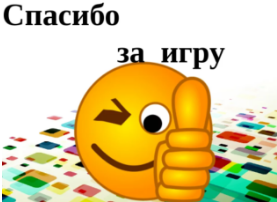